In [3]:
import os
import warnings
from tqdm import tqdm
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey

tqdm.pandas()
warnings.filterwarnings("ignore")

In [4]:
students_path = "./major_minor/students.csv"

In [5]:
df = pd.read_csv(students_path).dropna(subset=["cgpa", "mgpa"]).reset_index(drop=True)
df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa
0,ASP 2017-18,aania_asp18@ashoka.edu.in,UG-14-1609,Aania,Graduated,NaN,NaN,ASP,2018.0,2.64,0.0
1,ASP 2017-18,aashna.lal_asp18@ashoka.edu.in,UG-14-0568,Aashna Lal,Graduated,NaN,CW,ASP,2018.0,3.36,0.0
2,ASP 2017-18,abhinav.srikant_asp18@ashoka.edu.in,UG-14-1833,Abhinav Srikant,Graduated,PSY,MS,ASP,2018.0,3.14,0.0
3,ASP 2017-18,aditya.prakash_asp18@ashoka.edu.in,UG-14-1812,Aditya Prakash,Graduated,NaN,MAT,ASP,2018.0,3.57,0.0
4,ASP 2017-18,ahan.bezbaroa_asp18@ashoka.edu.in,UG-14-0336,Ahan Bezbaroa,Graduated,PPE,ENG,ASP,2018.0,3.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6992,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,0.0
6993,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,0.0
6994,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,0.0
6995,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,0.0


In [6]:
def plot_histogram(x1, bins, title, x_label, y_label, color1, lcolor1, x2=None, color2=None, lcolor2=None):

    if x2 is not None:
        ax = x1.hist(bins=bins, xlabelsize=10, ylabelsize=6, color=color1, density=True, alpha=0.8)
        plt.axvline(x1.median(), color=lcolor1, linestyle='dashed', linewidth=2)
        ax2 = x2.hist(bins=bins, xlabelsize=10, ylabelsize=6, color=color2, density=True, alpha=0.6)
        plt.axvline(x2.median(), color=lcolor2, linestyle='dashed', linewidth=2)
    else:
        ax = x1.hist(bins=bins, xlabelsize=10, ylabelsize=6, color=color1)
        plt.axvline(x1.median(), color=lcolor1, linestyle='dashed', linewidth=2)

    ax.set_title(title, weight='bold')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.grid(False)
    plt.show()

Mean: 3.34
Median: 3.49
Mode: 3.63
Std Dev: 0.56
Variance: 0.32


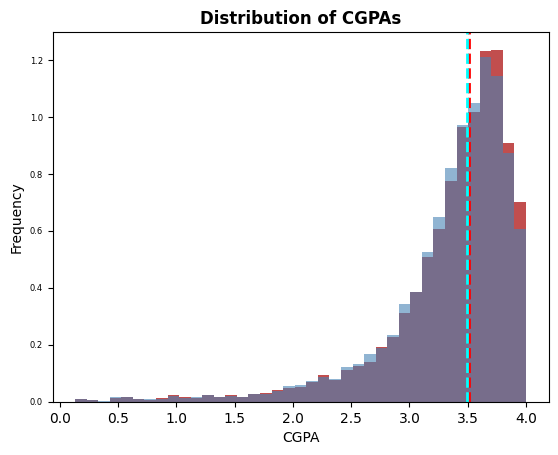

In [7]:
print(f'Mean: {statistics.mean(df[df["cgpa"] != 0]["cgpa"]):.2f}')
print(f'Median: {statistics.median(df[df["cgpa"] != 0]["cgpa"]):.2f}')
print(f'Mode: {statistics.mode(df[df["cgpa"] != 0]["cgpa"]):.2f}')
print(f'Std Dev: {statistics.stdev(df[df["cgpa"] != 0]["cgpa"]):.2f}')
print(f'Variance: {statistics.variance(df[df["cgpa"] != 0]["cgpa"]):.2f}')

plot_histogram(df[(df["cgpa"] != 0) & (df["grad"] <= 2024)]["cgpa"], 39, "Distribution of CGPAs", "CGPA", "Frequency", "firebrick", "red", df[df["cgpa"] != 0]["cgpa"], "steelblue", "aqua")

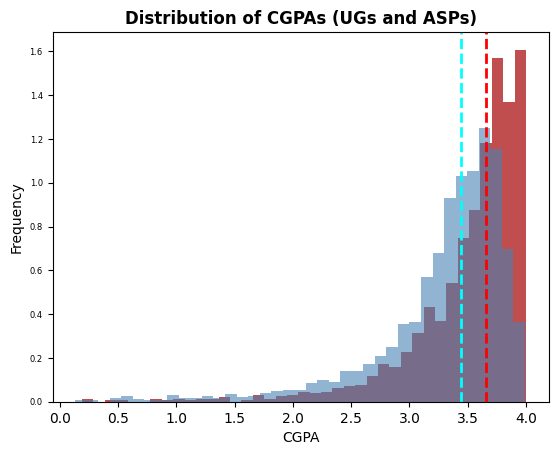

In [8]:
plot_histogram(df[(df["cgpa"] != 0) & (df["grad"] <= 2024) & (df["program"] == "ASP")]["cgpa"], 39, "Distribution of CGPAs (UGs and ASPs)", "CGPA", "Frequency", "firebrick", "red", df[(df["cgpa"] != 0) & (df["grad"] <= 2024) & (df["program"] == "UG")]["cgpa"], "steelblue", "aqua")

Mean: 3.34
Median: 3.47
Mode: 3.63
Std Dev: 0.54
Variance: 0.29


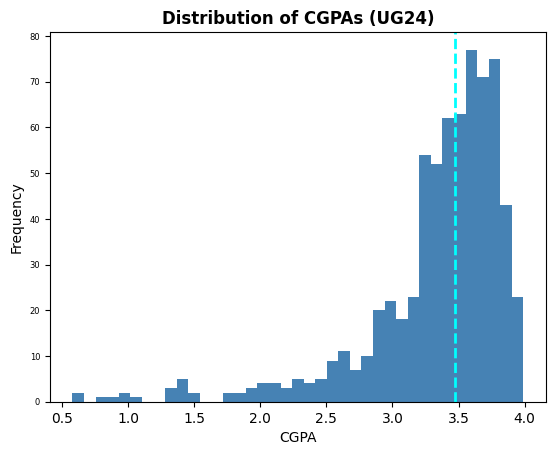

In [9]:
print(f'Mean: {statistics.mean(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Median: {statistics.median(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Mode: {statistics.mode(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Std Dev: {statistics.stdev(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Variance: {statistics.variance(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')

plot_histogram(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"], 39, "Distribution of CGPAs (UG24)", "CGPA", "Frequency", "steelblue", "aqua")

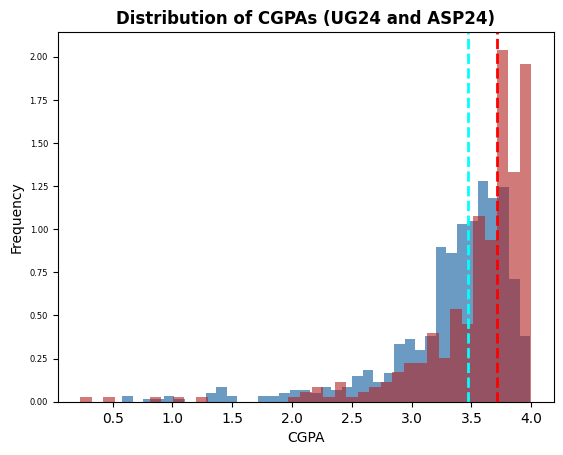

In [10]:
plot_histogram(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"], 39, "Distribution of CGPAs (UG24 and ASP24)", "CGPA", "Frequency", "steelblue", "aqua", df[(df["cgpa"] != 0) & (df["batch"] == "ASP 2023-24")]["cgpa"], "firebrick", "red")

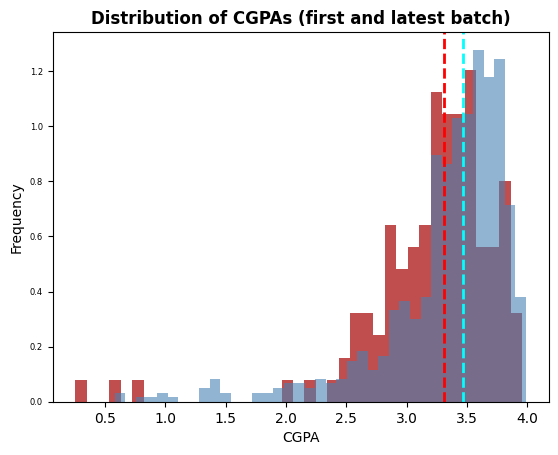

In [11]:
plot_histogram(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2014-17")]["cgpa"], 39, "Distribution of CGPAs (first and latest batch)", "CGPA", "Frequency", "firebrick", "red", df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"], "steelblue", "aqua")

In [12]:
ugs = df[(df["program"] == "UG") & (df["cgpa"] != 0)].dropna(subset=["major"]).reset_index(drop=True)
asps = df[(df["program"] == "ASP") & (df["cgpa"] != 0)]

In [13]:
def plot_gpas(df, cat, lims):
    categories = df[cat].unique()
    categories.sort()
    colors = plt.cm.get_cmap('Spectral', len(categories))
    color_map = {category: colors(i) for i, category in enumerate(categories)}
    df["colour"] = df[cat].map(color_map)

    df.plot.scatter(x="cgpa", y="mgpa", c=df["colour"], alpha=0.8)

    for category in categories:
        plt.scatter([], [], color=color_map[category], label=category)
    plt.legend(title='Major', fontsize=6)

    plt.title('CGPA and MGPA by Major', weight="bold")
    plt.xlabel('CGPA')
    plt.ylabel('MGPA')
    plt.xlim(lims[0], lims[1])
    plt.ylim(lims[0], lims[1])
    plt.grid(False)
    plt.show()

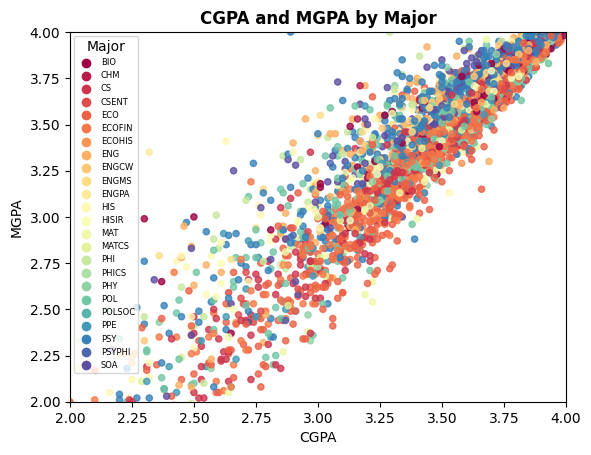

In [14]:
plot_gpas(ugs[ugs["grad"] <= 2025], "major", (2.0, 4.0))

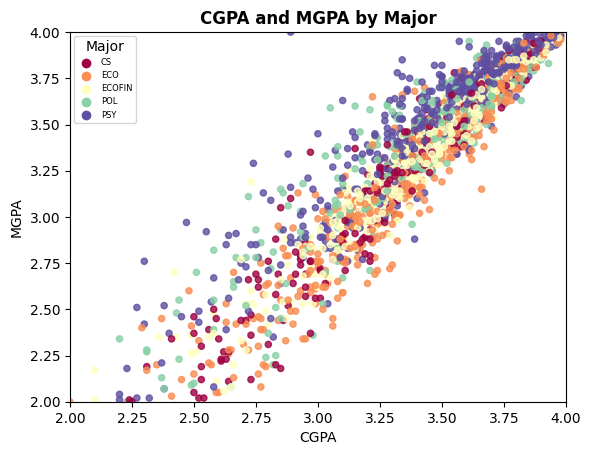

In [15]:
plot_gpas(ugs[(ugs["grad"] <= 2025) & (ugs["major"].isin(["ECOFIN", "ECO", "PSY", "POL", "CS"]))], "major", (2.0, 4.0))

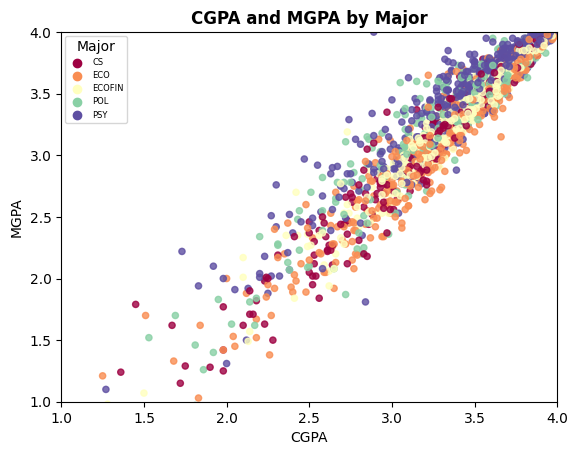

In [16]:
plot_gpas(ugs[(ugs["grad"] <= 2025) & (ugs["major"].isin(["ECOFIN", "ECO", "PSY", "POL", "CS"]))], "major", (1.0, 4.0))

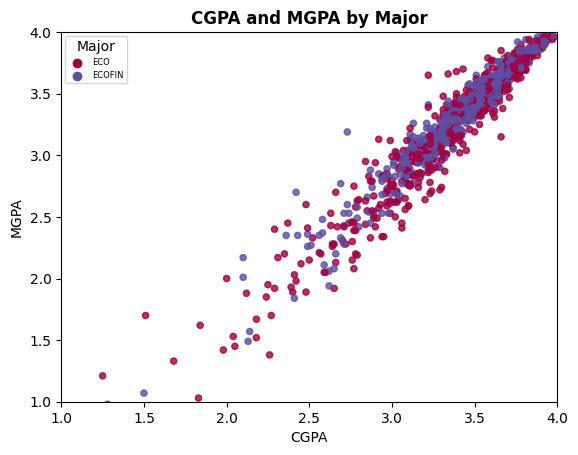

In [17]:
plot_gpas(ugs[(ugs["grad"] <= 2025) & (ugs["major"].isin(["ECOFIN", "ECO"]))], "major", (1.0, 4.0))

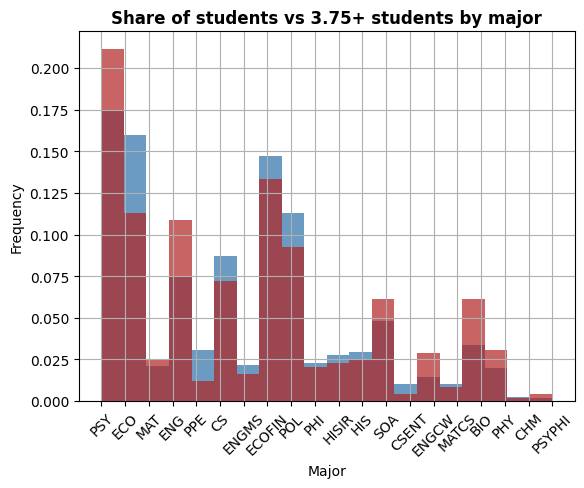

In [18]:
latins = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["cgpa"] > 3.75)]
students = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["major"].isin(latins["major"].unique()))]

ax = students["major"].hist(bins=students["major"].nunique(), color="steelblue", density=True, alpha=0.8)
ax2 = latins["major"].hist(bins=latins["major"].nunique(), color="firebrick", density=True, alpha=0.7)
ax.set_title('Share of students vs 3.75+ students by major', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

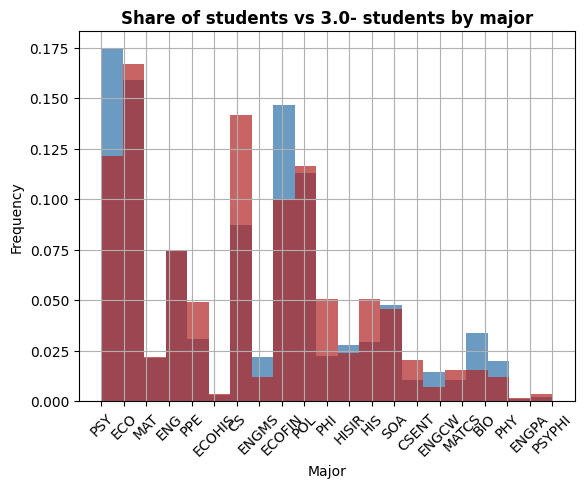

In [19]:
latins = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["cgpa"] < 3.0)]
students = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["major"].isin(latins["major"].unique()))]

ax = students["major"].hist(bins=students["major"].nunique(), color="steelblue", density=True, alpha=0.8)
ax2 = latins["major"].hist(bins=latins["major"].nunique(), color="firebrick", density=True, alpha=0.7)
ax.set_title('Share of students vs 3.0- students by major', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
def construct_means_over_time(df, is_major=False, start_year=2017):
    cmeans_yearly, cmedians_yearly = [], []
    for year in range(start_year, 2025):
        cmeans_yearly.append((year, statistics.mean(df[df["grad"] == year]["cgpa"])))
        cmedians_yearly.append((year, statistics.median(df[df["grad"] == year]["cgpa"])))

    years = pd.DataFrame(cmeans_yearly, columns=["year", "meanc"])
    years["medianc"] = [x[1] for x in cmedians_yearly]

    if is_major:
        mmeans_yearly, mmedians_yearly = [], []
        for year in range(2017, 2025):
            mmeans_yearly.append((year, statistics.mean(df[df["grad"] == year]["mgpa"])))
            mmedians_yearly.append((year, statistics.median(df[df["grad"] == year]["mgpa"])))

        years["meanm"] = [x[1] for x in mmeans_yearly]
        years["medianm"] = [x[1] for x in mmedians_yearly]

    return years

In [21]:
def plot_means_over_time(df, title, is_major=False):
    ax = df["meanc"].plot(kind='line', linestyle="dotted", marker='o', x="year", y="cgpa", color="steelblue")
    ax2 = df["medianc"].plot(kind='line', linestyle="solid", marker='o', x="year", y="cgpa", color="steelblue")
    if is_major:
        ax3 = df["meanm"].plot(kind='line', linestyle="dotted", marker='o', x="year", y="cgpa", color="firebrick")
        ax4 = df["medianm"].plot(kind='line', linestyle="solid", marker='o', x="year", y="cgpa", color="firebrick")
    plt.title(title, weight="bold")
    plt.xlabel('Year')
    plt.ylabel("CGPA")
    ax.set_xticklabels([2017] + list(df["year"]))
    plt.grid(False)
    plt.show()

In [72]:
def plot_major_gpa_over_time(df, value, title, sizes=False):

    # Create df of count and median GPA by year and major
    majors = ["ECOFIN", "ECO", "PSY", "POL", "CS", "ENG", "SOA"]
    majors_df = construct_means_over_time(df[df["major"] == "ECOFIN"], is_major=True)
    majors_df["major"] = "ECOFIN"

    for major in majors[1:]:
        major_df = construct_means_over_time(df[df["major"] == major], is_major=True)
        major_df["major"] = major
        majors_df = pd.concat([majors_df, major_df])
    majors_df.reset_index(drop=True, inplace=True)

    colours = plt.cm.get_cmap('Spectral', len(majors))
    colour_map = {category: colours(i) for i, category in enumerate(majors)}
    majors_df["colour"] = majors_df["major"].map(colour_map)

    for major in majors:
        for year in majors_df["year"].unique():
            majors_df.loc[(majors_df["major"] == major) & (majors_df["year"] == year), "count"] = df[(df["major"] == major) & (df["grad"] == year)]["email"].nunique()

    for major in majors:
        subset = majors_df[majors_df["major"] == major]
        if sizes:
            plt.scatter(x=subset["year"], y=subset[value], color=colour_map[major], s=subset["count"])
        else:
            plt.plot(subset["year"], subset[value], label=major, color=colour_map[major], marker='.')

    plt.legend(title='Major', fontsize=6)
    plt.title(title, weight="bold")
    plt.xlabel('Year')
    plt.ylabel("CGPA")
    ax.set_xticklabels([2017] + list(majors_df["year"]))
    plt.grid(False)
    plt.show()

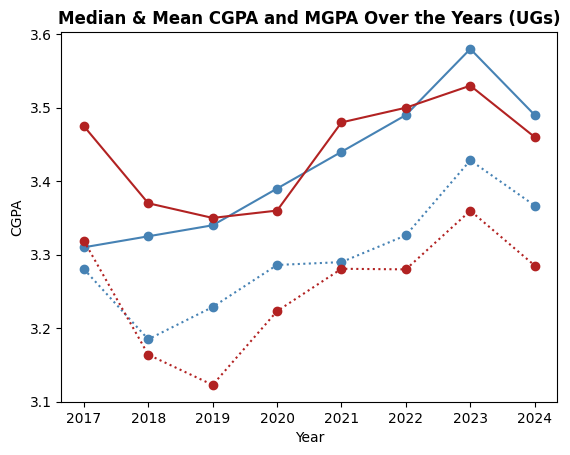

In [62]:
plot_means_over_time(construct_means_over_time(ugs, is_major=True), "Median & Mean CGPA and MGPA Over the Years (UGs)", is_major=True)

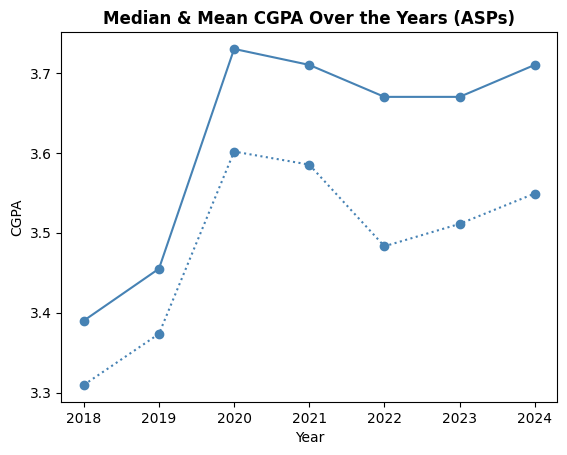

In [63]:
plot_means_over_time(construct_means_over_time(asps, start_year=2018), "Median & Mean CGPA Over the Years (ASPs)")

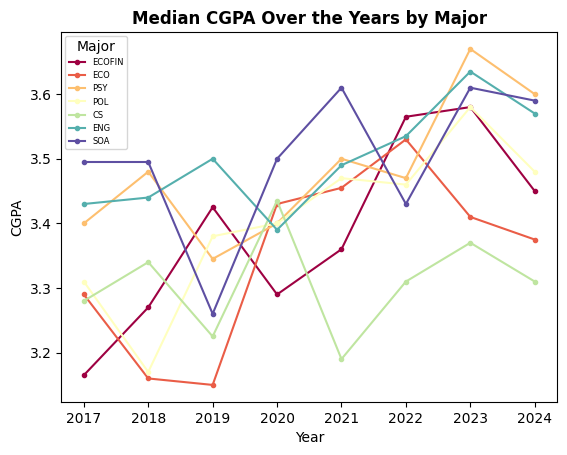

In [73]:
plot_major_gpa_over_time(ugs, "medianc", "Median CGPA Over the Years by Major", sizes=False)

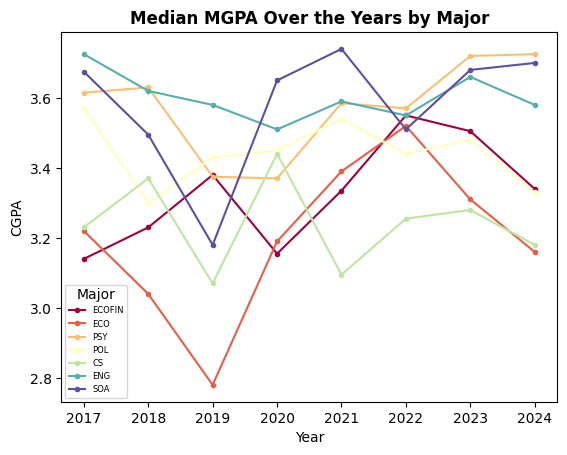

In [65]:
plot_major_gpa_over_time(ugs, "medianm", "Median MGPA Over the Years by Major", sizes=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


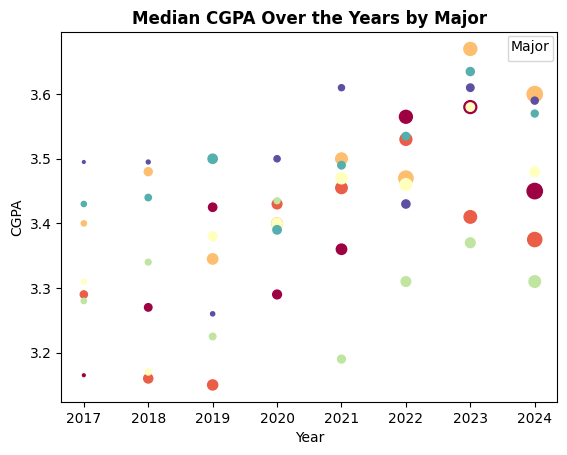

In [66]:
plot_major_gpa_over_time(ugs, "medianc", "Median CGPA Over the Years by Major", sizes=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


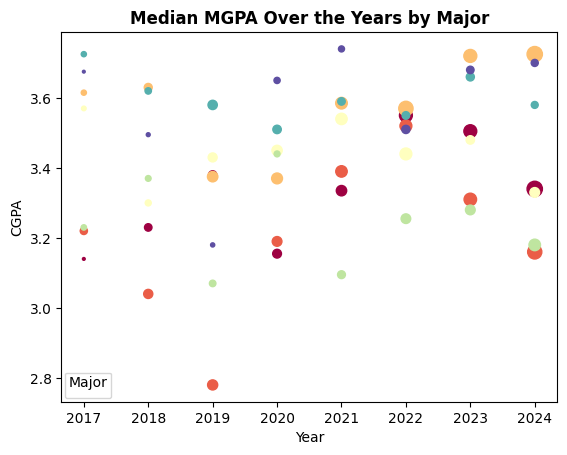

In [67]:
plot_major_gpa_over_time(ugs, "medianm", "Median MGPA Over the Years by Major", sizes=True)